![](matplotlib.jpg)

## Matplotlib
Matplotlib é uma biblioteca para criar visualizações estáticas, animadas e interativas em Python.

__Importando a biblioteca:__

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

__Gráfico de linhas:__

In [8]:
np.random.seed(7)

# Vetor com números inteiros aleatórios entre 1 e 1500, com 10 amostras
y = np.random.randint(low = 1, high = 1500, size = 10)

In [9]:
y

array([ 176, 1221,  538,  503,  212,  920, 1373, 1210, 1423,  536])

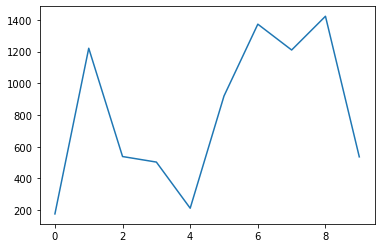

In [10]:
plt.plot(y)

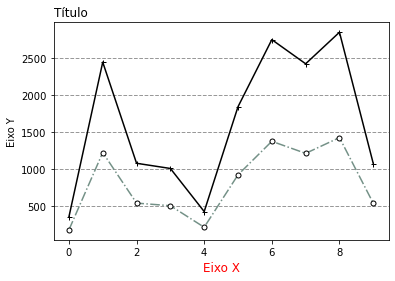

In [11]:
# Insere a primeira linha no plot
plt.plot(y, color = '#749187', marker = 'o', ms = 5, mec = 'k',
        markerfacecolor = 'w', ls = '-.')

# Insere a segunda linha no plot
plt.plot(y * 2, marker = '+', color = 'k', ms = 5)

# Rótulos
plt.xlabel('Eixo X', color = 'red', size = 12)
plt.ylabel('Eixo Y')
plt.title('Título', loc = 'left')

# Gridlines
plt.grid(axis = 'y', color = 'gray', linestyle = '--', linewidth = 1, alpha = 0.8)

plt.show()

__Subplot:__

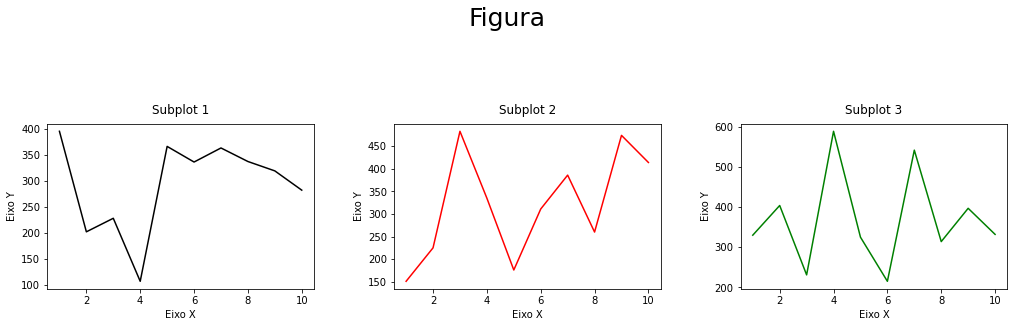

In [12]:
# Forma de criar subplot 1

np.random.seed(6)
x = np.arange(1, 11)
y1 = np.random.randint(1, 400, 10)
y2 = np.random.randint(150, 500, 10)
y3 = np.random.randint(200, 600, 10)

plt.figure(figsize = (15, 5))
plt.suptitle('Figura', fontsize = 25)

plt.subplot(1, 3, 1)
plt.plot(x, y1, color = 'k')
plt.title('Subplot 1', pad = 10)
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')

plt.subplot(1, 3, 2)
plt.plot(x, y2, color = 'r')
plt.title('Subplot 2', pad = 10)
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')

plt.subplot(1, 3, 3)
plt.plot(x, y3, color = 'g')
plt.title('Subplot 3', pad = 10)
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')

plt.tight_layout(pad = 4)
plt.show()

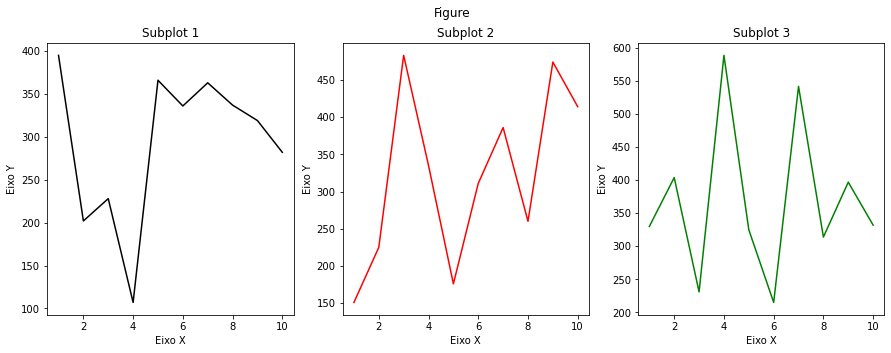

In [13]:
# Forma de criar subplot 2

fig, ax = plt.subplots(1, 3, figsize = (15, 5))
fig.suptitle('Figure')
ax[0].plot(x, y1, color = 'black')
ax[1].plot(x, y2, color = 'red')
ax[2].plot(x, y3, color = 'green')

for i in range(3):
    ax[i].set(title = f'Subplot {i + 1}', xlabel = 'Eixo X', ylabel = 'Eixo Y')

__Histograma e Boxplot:__

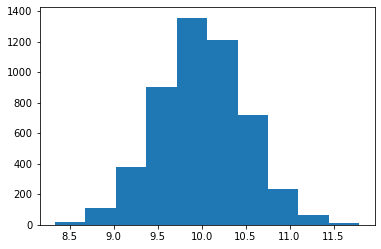

In [14]:
data = np.random.normal(10, 0.5, 5000)
plt.hist(data)
plt.show()

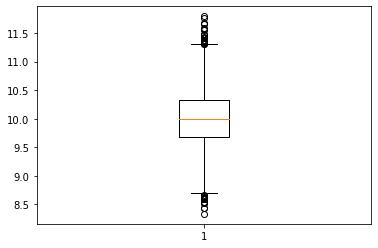

In [15]:
plt.boxplot(data);

__Scatter plot:__

In [16]:
x = np.random.normal(10, 0.5, 100)
y = np.random.uniform(0, 20, 100)

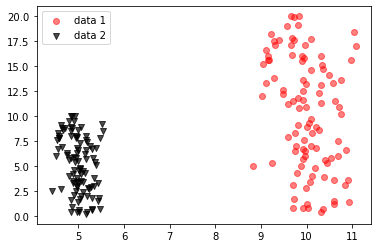

In [17]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(x, y, marker = 'o', color = 'red', label = 'data 1', alpha = 0.5)
ax.scatter(x * 0.5, y * 0.5, marker = 'v', color = 'black', label = 'data 2', alpha = 0.7)
ax.legend();

__Dados econômicos:__

In [18]:
import plotly.express as px

In [19]:
px.data.gapminder()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


In [20]:
df = px.data.gapminder().query('country == "Brazil"').set_index('year')

In [21]:
df.head()

,country,continent,lifeExp,pop,gdpPercap,iso_alpha,iso_num
year,,,,,,,
1952,Brazil,Americas,50.917,56602560,2108.944355,BRA,76
1957,Brazil,Americas,53.285,65551171,2487.365989,BRA,76
1962,Brazil,Americas,55.665,76039390,3336.585802,BRA,76
1967,Brazil,Americas,57.632,88049823,3429.864357,BRA,76
1972,Brazil,Americas,59.504,100840058,4985.711467,BRA,76


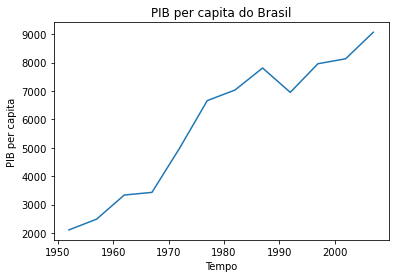

In [23]:
plt.plot(df.index, df['gdpPercap'])
plt.title('PIB per capita do Brasil')
plt.ylabel('PIB per capita')
plt.xlabel('Tempo');

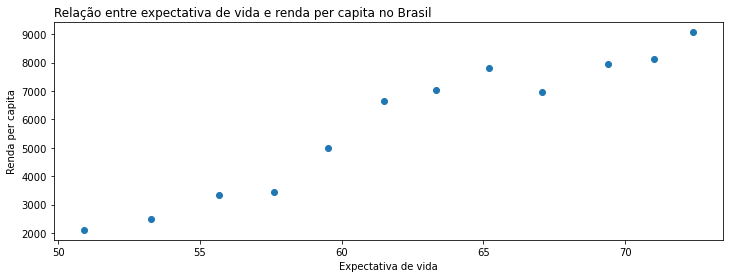

In [25]:
title = 'Relação entre expectativa de vida e renda per capita no Brasil'

plt.figure(figsize = (12, 4))
plt.scatter(df['lifeExp'], df['gdpPercap'], cmap = 'viridis')
plt.xlabel('Expectativa de vida')
plt.ylabel('Renda per capita')
plt.title(title, loc = 'left')
plt.show()

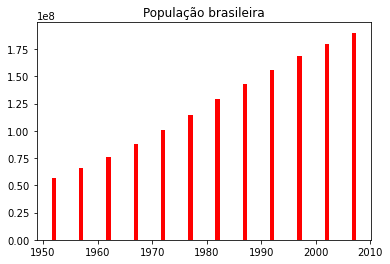

In [27]:
plt.bar(x = df.index,
        height = df['pop'],
        color = 'red')
plt.title('População brasileira');

In [28]:
def filtrar_continente(continente):
    df = px.data.gapminder()
    df = df[df['continent'] == continente]
    return df

In [29]:
def filtrar_pais(pais, variavel):
    'Filtra algum país da amostra para as variáveis "pop", "gdpPercap" e "lifeExp"'
    df = px.data.gapminder()
    df = df[df['country'] == pais][variavel]
    return df

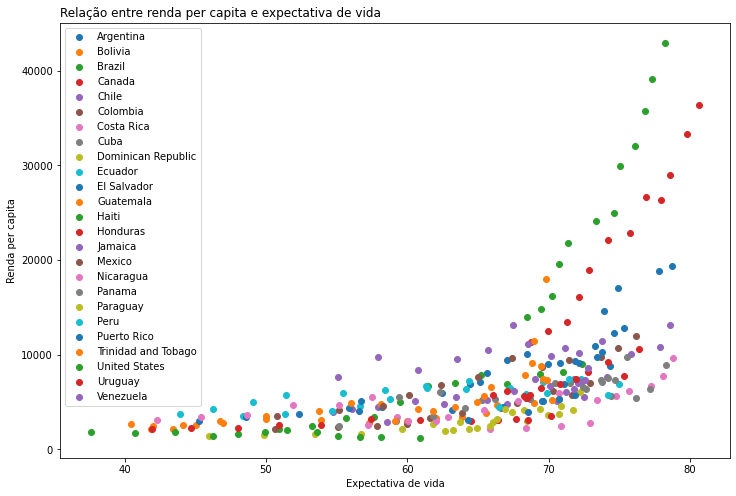

In [31]:
americas = filtrar_continente('Americas')
paises = americas['country'].unique()
plt.figure(figsize = (12, 8))
for pais in paises:
    plt.scatter(filtrar_pais(pais = pais, variavel = 'lifeExp'),
                filtrar_pais(pais = pais, variavel = 'gdpPercap'))

plt.legend(labels = paises, loc = 'best')
plt.title('Relação entre renda per capita e expectativa de vida', loc = 'left')
plt.xlabel('Expectativa de vida')
plt.ylabel('Renda per capita');